In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('ecommerce retail.xlsx')

In [3]:
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.dropna(subset=['CustomerID'], axis=0).drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['Country'] == 'United Kingdom')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,485123.000000,485123,485123.000000,354321.000000
mean,9.610738,2011-07-04 12:35:09.919504896,3.849679,15552.486392
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-27 13:56:00,1.250000,14194.000000
50%,3.000000,2011-07-19 15:23:00,2.100000,15522.000000
75%,10.000000,2011-10-20 13:07:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,13541.330000,18287.000000
std,161.904143,NaN,34.677371,1594.527150


In [10]:
now = pd.to_datetime('2011-12-31')
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (now - x).days)
recency




CustomerID
12346.0    346
12747.0     23
12748.0     21
12749.0     24
12820.0     24
          ... 
18280.0    298
18281.0    201
18282.0     28
18283.0     24
18287.0     63
Name: InvoiceDate, Length: 3920, dtype: int64

In [11]:
frequency = df.groupby(['CustomerID','InvoiceDate']).size().groupby('CustomerID').count()
frequency

CustomerID
12346.0      1
12747.0     11
12748.0    210
12749.0      5
12820.0      4
          ... 
18280.0      1
18281.0      1
18282.0      2
18283.0     16
18287.0      3
Length: 3920, dtype: int64

In [12]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary

CustomerID
12346.0    77183.60
12747.0     4196.01
12748.0    33719.73
12749.0     4090.88
12820.0      942.34
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Amount, Length: 3920, dtype: float64

In [13]:
rfm_data = pd.concat([recency, frequency, monetary], axis=1)
rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

In [14]:
rfm_data.reset_index(inplace=True)
rfm_data

,CustomerID,Recency,Frequency,Monetary
0,12346.0,346,1,77183.60
1,12747.0,23,11,4196.01
2,12748.0,21,210,33719.73
3,12749.0,24,5,4090.88
4,12820.0,24,4,942.34
...,...,...,...,...
3915,18280.0,298,1,180.60
3916,18281.0,201,1,80.82
3917,18282.0,28,2,178.05
3918,18283.0,24,16,2094.88


In [15]:
rfm_data['R'] = pd.qcut(rfm_data['Recency'].rank(method ='first'), q = 5, labels = range(5, 0, -1))
rfm_data['F'] = pd.qcut(rfm_data['Frequency'].rank(method ='first'), q = 5, labels = range(1,6))
rfm_data['M'] = pd.qcut(rfm_data['Monetary'], q = 5, labels = range(1,6))
rfm_data

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,346,1,77183.60,1,1,5
1,12747.0,23,11,4196.01,5,5,5
2,12748.0,21,210,33719.73,5,5,5
3,12749.0,24,5,4090.88,5,4,5
4,12820.0,24,4,942.34,5,4,4
...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1
3916,18281.0,201,1,80.82,1,2,1
3917,18282.0,28,2,178.05,5,3,1
3918,18283.0,24,16,2094.88,5,5,5


In [16]:
rfm_data['RFM_Score'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)
rfm_data['RFM_Score'] = rfm_data['RFM_Score'].astype('int64')
rfm_data

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,346,1,77183.60,1,1,5,115
1,12747.0,23,11,4196.01,5,5,5,555
2,12748.0,21,210,33719.73,5,5,5,555
3,12749.0,24,5,4090.88,5,4,5,545
4,12820.0,24,4,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1,121
3916,18281.0,201,1,80.82,1,2,1,121
3917,18282.0,28,2,178.05,5,3,1,531
3918,18283.0,24,16,2094.88,5,5,5,555


In [17]:
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [18]:
seg['RFM_Score'] = seg['RFM_Score'].str.split(',') # convert comma-separated string to a list of rfm scores
seg = seg.explode('RFM_Score').reset_index(drop=True) # transform each element of a list-like to a row
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [19]:
joined = rfm_data.merge(seg, how='left', on='RFM_Score')
joined

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12747.0,23,11,4196.01,5,5,5,555,Champions
2,12748.0,21,210,33719.73,5,5,5,555,Champions
3,12749.0,24,5,4090.88,5,4,5,545,Champions
4,12820.0,24,4,942.34,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1,121,Lost customers
3916,18281.0,201,1,80.82,1,2,1,121,Lost customers
3917,18282.0,28,2,178.05,5,3,1,531,Potential Loyalist
3918,18283.0,24,16,2094.88,5,5,5,555,Champions


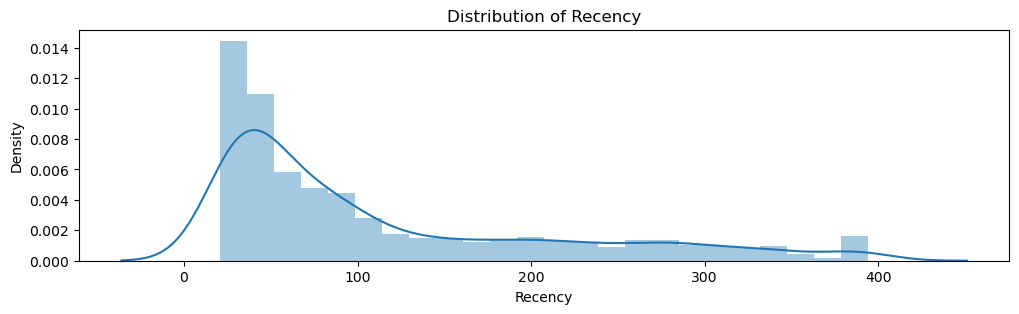

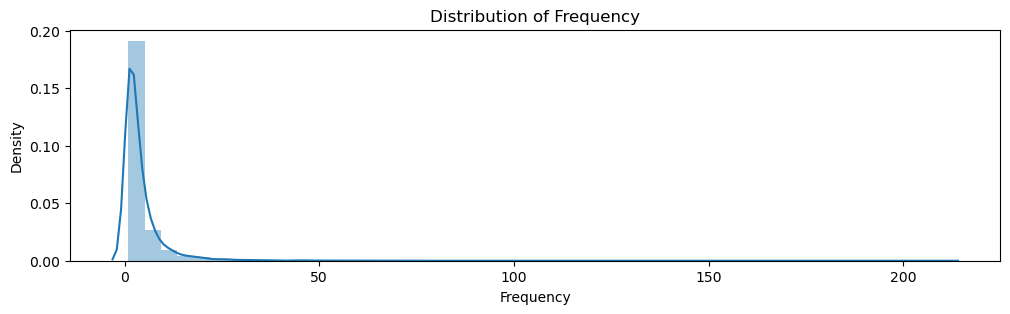

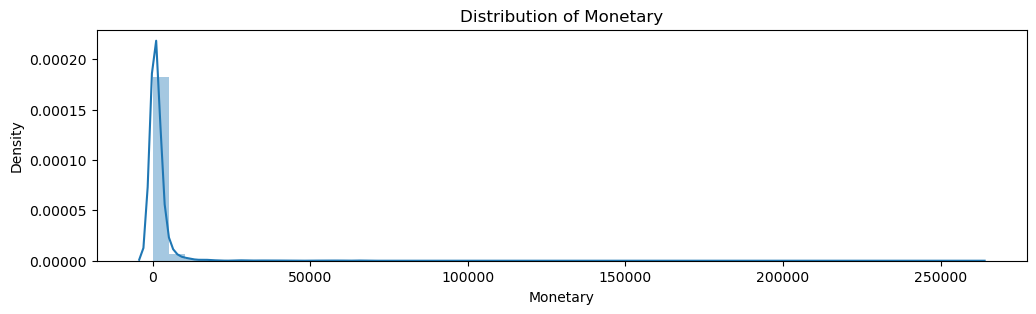

In [20]:
colname = ['Recency', 'Frequency', 'Monetary']

for col in colname:
    fig, ax = plt.subplots(figsize = (12,3))
    sns.distplot(joined[col])
    ax.set_title('Distribution of %s' %col)
    plt.show()

In [21]:
df_visualization = joined.groupby('Segment').agg(
    Cust_count = ('CustomerID', 'count'),
    Avg_recency=('Recency','mean'),
    Avg_frequency=('Frequency','mean'),
    Avg_monetary=('Monetary','mean'),
    Total_sales = ('Monetary', 'sum')
).reset_index()

df_visualization

,Segment,Cust_count,Avg_recency,Avg_frequency,Avg_monetary,Total_sales
0,About To Sleep,252,107.686508,1.305556,269.064603,67804.280
1,At Risk,386,163.670984,3.810881,1701.166479,656650.261
2,Cannot Lose Them,79,259.645570,2.506329,2180.993291,172298.470
3,Champions,752,31.590426,11.867021,5907.985638,4442805.200
4,Hibernating customers,642,170.127726,1.534268,390.579956,250752.332
5,Lost customers,435,293.524138,1.071264,191.330552,83228.790
6,Loyal,384,57.140625,5.325521,2253.355052,865288.340
7,Need Attention,266,53.127820,3.109023,1665.212372,442946.491
8,New Customers,244,49.299180,1.069672,210.875328,51453.580
9,Potential Loyalist,372,46.986559,2.446237,529.132527,196837.300


In [22]:
df_visualization['Avg_recency'] = df_visualization['Avg_recency'].round(2)
df_visualization['Avg_frequency'] = df_visualization['Avg_frequency'].round(2)
df_visualization['Avg_monetary'] = df_visualization['Avg_monetary'].round(2)
df_visualization['Count_share'] = df_visualization['Cust_count']/sum(df_visualization['Cust_count'])
df_visualization['Sales_share'] = df_visualization['Total_sales']/sum(df_visualization['Total_sales'])
df_visualization

,Segment,Cust_count,Avg_recency,Avg_frequency,Avg_monetary,Total_sales,Count_share,Sales_share
0,About To Sleep,252,107.69,1.31,269.06,67804.280,0.064286,0.009278
1,At Risk,386,163.67,3.81,1701.17,656650.261,0.098469,0.089849
2,Cannot Lose Them,79,259.65,2.51,2180.99,172298.470,0.020153,0.023575
3,Champions,752,31.59,11.87,5907.99,4442805.200,0.191837,0.607905
4,Hibernating customers,642,170.13,1.53,390.58,250752.332,0.163776,0.034310
5,Lost customers,435,293.52,1.07,191.33,83228.790,0.110969,0.011388
6,Loyal,384,57.14,5.33,2253.36,865288.340,0.097959,0.118397
7,Need Attention,266,53.13,3.11,1665.21,442946.491,0.067857,0.060608
8,New Customers,244,49.30,1.07,210.88,51453.580,0.062245,0.007040
9,Potential Loyalist,372,46.99,2.45,529.13,196837.300,0.094898,0.026933


In [23]:
colors1 = sns.color_palette('RdBu_r',11)

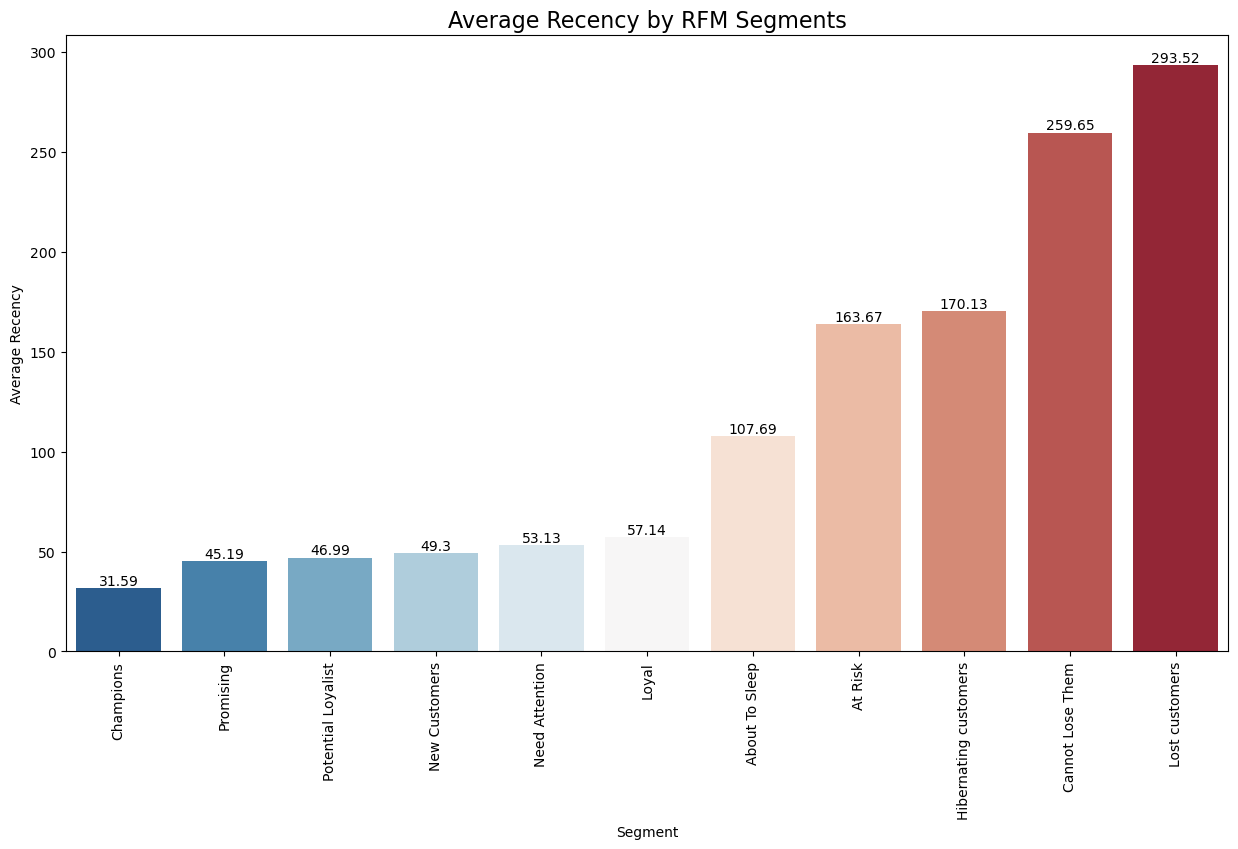

In [24]:
fig, ax = plt.subplots(1, figsize = (15,8))
r_chart = sns.barplot(x = 'Segment',
            y = 'Avg_recency',
            data = df_visualization.sort_values('Avg_recency'),
            palette = colors1)
r_chart.set_title('Average Recency by RFM Segments', fontsize = 16)
r_chart.set(xlabel = 'Segment',
            ylabel = 'Average Recency')
plt.xticks(rotation = 90)

for i, p in enumerate(r_chart.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, df_visualization.sort_values('Avg_recency')['Avg_recency'].values[i],
            ha='center', va='bottom')

plt.show()

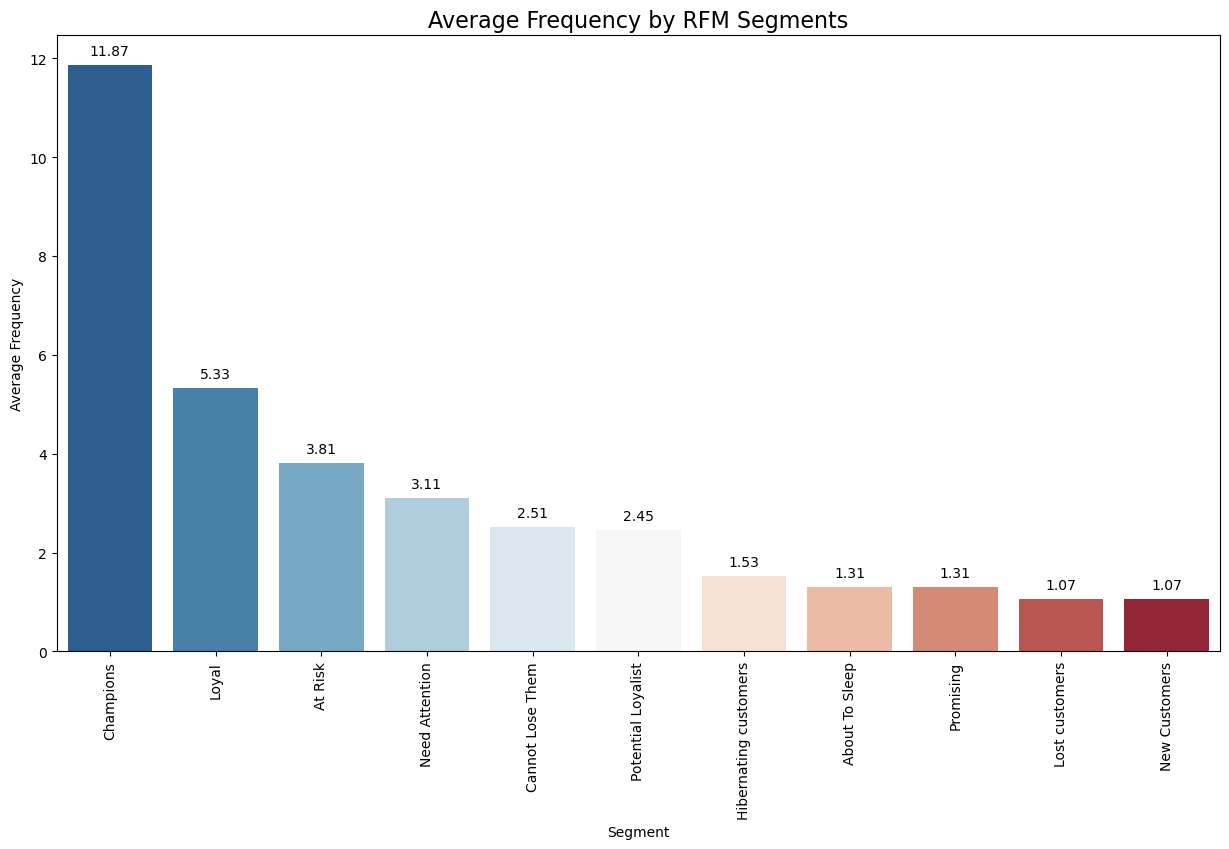

In [25]:
fig, ax = plt.subplots(1, figsize = (15,8))
f_chart = sns.barplot(x='Segment',
            y = 'Avg_frequency',
            data=df_visualization.sort_values('Avg_frequency',ascending = False),
            palette = colors1)
f_chart.set_title('Average Frequency by RFM Segments', fontsize = 16)
f_chart.set(xlabel = 'Segment',
            ylabel = 'Average Frequency')
plt.xticks(rotation = 90)

for p in f_chart.patches:
    f_chart.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()

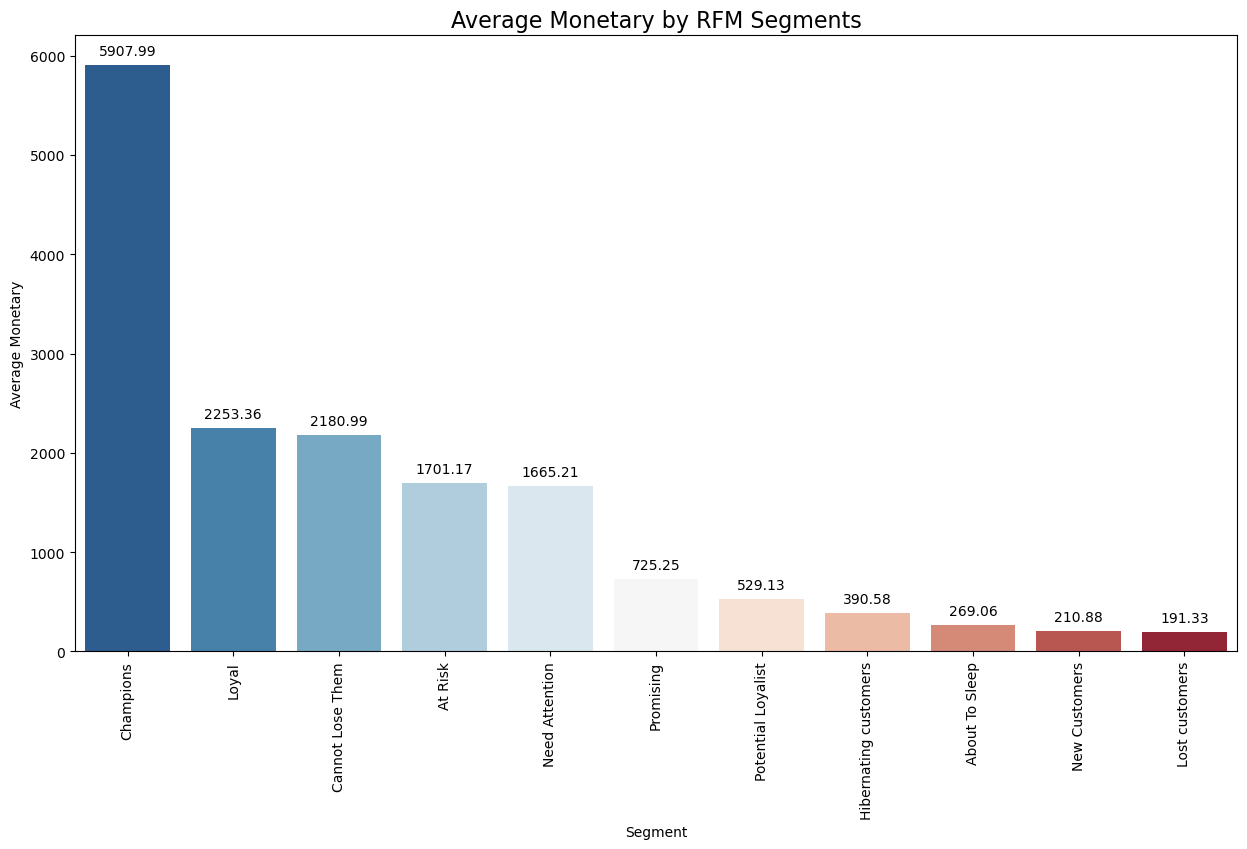

In [26]:
fig, ax = plt.subplots(1, figsize = (15,8))
m_chart = sns.barplot(x='Segment',
            y = 'Avg_monetary',
            data=df_visualization.sort_values('Avg_monetary',ascending = False),
            palette = colors1)
m_chart.set_title('Average Monetary by RFM Segments', fontsize = 16)
m_chart.set(xlabel = 'Segment',
            ylabel = 'Average Monetary')
plt.xticks(rotation = 90)

for p in m_chart.patches:
    m_chart.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center',
                     va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.show()

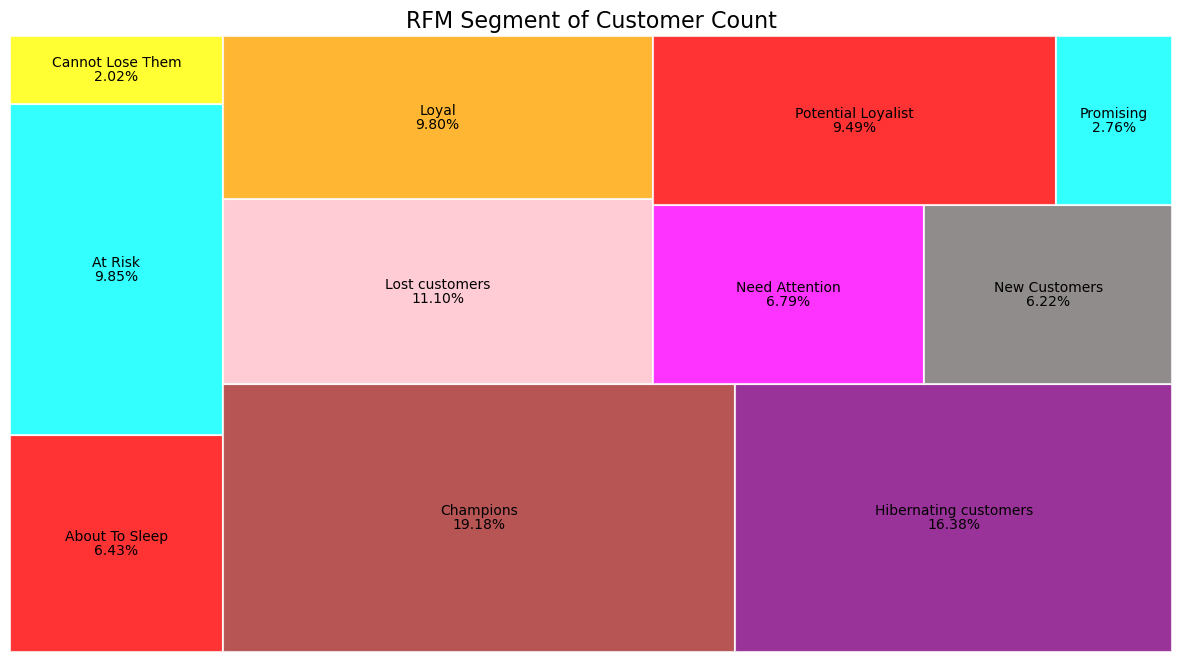

In [27]:
colors2 = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes = df_visualization['Cust_count'], 
              label = df_visualization['Segment'],
              value = [f'{x*100:.2f}%' for x in df_visualization['Count_share']],
              alpha = .8,
              color = colors2,
              bar_kwargs = dict(linewidth = 1.5, edgecolor = "white")
             )
plt.title('RFM Segment of Customer Count', fontsize = 16)
plt.axis('off')
plt.show()

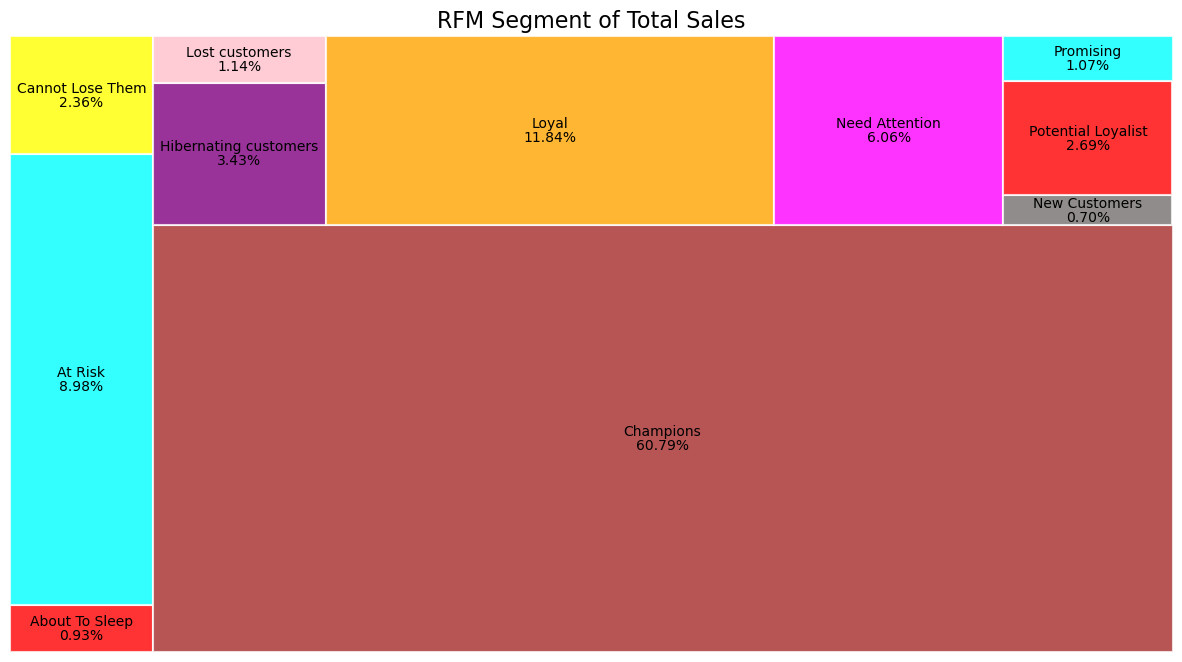

In [28]:
fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes = df_visualization['Total_sales'], 
              label = df_visualization['Segment'],
              value = [f'{x*100:.2f}%' for x in df_visualization['Sales_share']],
              alpha = .8,
              color = colors2,
              bar_kwargs = dict(linewidth = 1.5, edgecolor = "white")
             )
plt.title('RFM Segment of Total Sales', fontsize = 16)
plt.axis('off')
plt.show()